<a href="https://colab.research.google.com/github/iigomartin/5.EOMA_UMH/blob/main/1_5_CurrenciesTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

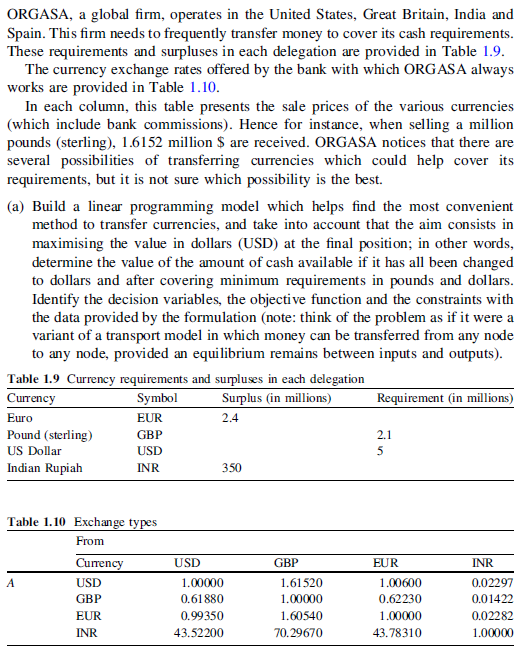

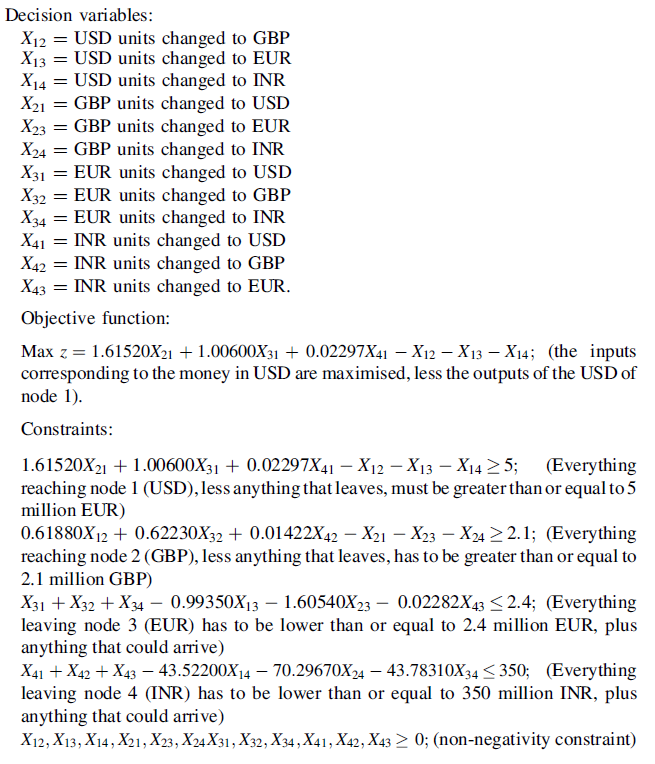

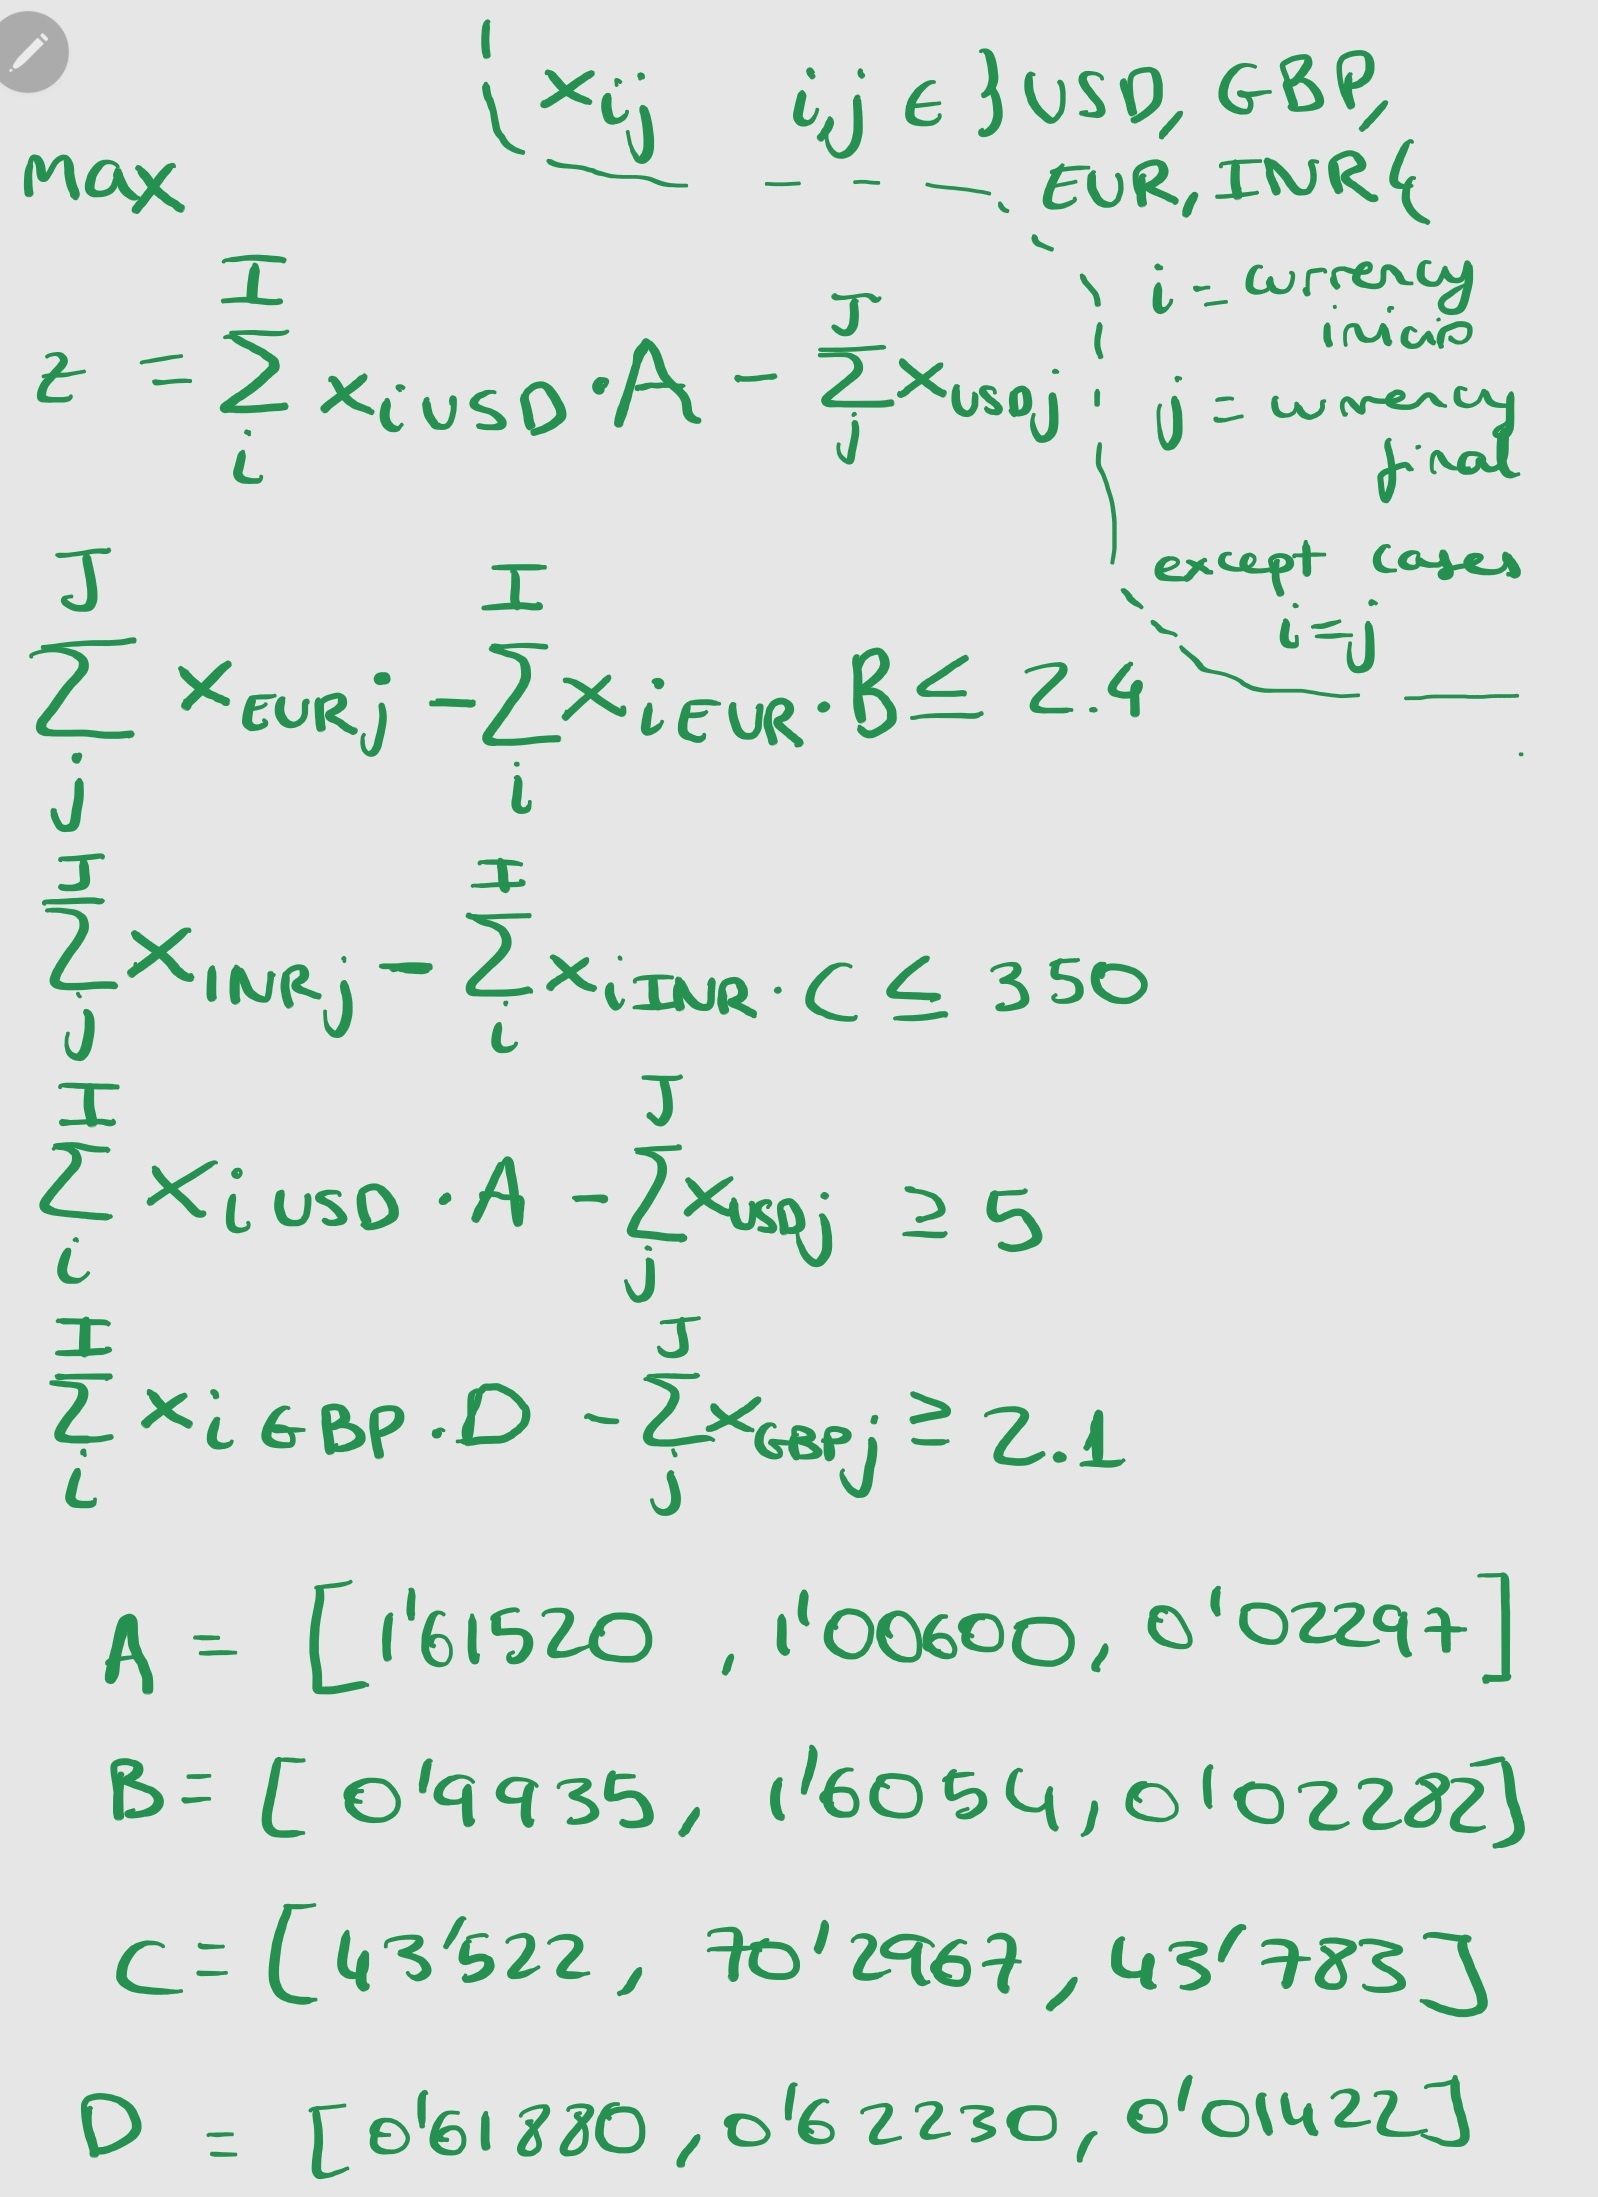

In [ ]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [ ]:
#Defining the model

model = pyo.ConcreteModel()

In [ ]:
#Defining the sets

model.i=pyo.Set(initialize = ["usd","gbp","eur","inr"])

In [ ]:
#Defining the parameters

model.T = pyo.Param(model.i,model.i, initialize={("usd","usd"):1.00000,("usd","gbp"):1.61520,("usd","eur"):1.00600,("usd","inr"):0.02297,
                                                 ("gbp","usd"):0.61880,("gbp","gbp"):1.00000,("gbp","eur"):0.62230,("gbp","inr"):0.01422,
                                                 ("eur","usd"):0.99350,("eur","gbp"):1.60540,("eur","eur"):1.00000,("eur","inr"):0.02282,
                                                 ("inr","usd"):43.5220,("inr","gbp"):70.29670,("inr","eur"):43.78310,("inr","inr"):1.00000})
T = model.T

In [ ]:
#Decision variables

model.x=pyo.Var(model.i, model.i, within=pyo.NonNegativeReals, initialize=0)
x=model.x

In [ ]:
#Objective rule and constraints
def Objective_rule(model):
  return sum(T["usd",i]*x[i,"usd"] for i in model.i)-sum(x["usd",i] for i in model.i)
model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.maximize)

def Constraint1(model):
  return sum(x["eur",i] for i in model.i)-sum(T["eur",i]*x[i,"eur"] for i in model.i)  <= 2.4
model.Const1 = pyo.Constraint(rule=Constraint1)

def Constraint2(model):
  return sum(x["inr",i] for i in model.i)-sum(T["inr",i]*x[i,"inr"] for i in model.i)  <= 350
model.Const2 = pyo.Constraint(rule=Constraint2)

def Constraint3(model):
  return sum(T["usd",i]*x[i,"usd"] for i in model.i)-sum(x["usd",i] for i in model.i) >=5
model.Const3 = pyo.Constraint(rule=Constraint3)

def Constraint4(model):
  return sum(T["gbp",i]*x[i,"gbp"] for i in model.i)-sum(x["gbp",i] for i in model.i) >=2.1
model.Const4 = pyo.Constraint(rule=Constraint4)

In [ ]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [ ]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 7.061705907173
  Upper bound: 7.061705907173
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 12
  Number of nonzeros: 24
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0033409595489501953
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
print("objective function: ", model.Obj())
for i,j in x:
    print('Transfer from currency ',i,' to currency ',j,': ', x[i,j](), ' ',i)

objective function:  7.061705907172991
Transfer from currency  usd  to currency  usd :  0   usd
Transfer from currency  usd  to currency  gbp :  0.0   usd
Transfer from currency  usd  to currency  eur :  0.0   usd
Transfer from currency  usd  to currency  inr :  0.0   usd
Transfer from currency  gbp  to currency  usd :  0.0   gbp
Transfer from currency  gbp  to currency  gbp :  0   gbp
Transfer from currency  gbp  to currency  eur :  0.0   gbp
Transfer from currency  gbp  to currency  inr :  0.0   gbp
Transfer from currency  eur  to currency  usd :  2.4   eur
Transfer from currency  eur  to currency  gbp :  0.0   eur
Transfer from currency  eur  to currency  eur :  0   eur
Transfer from currency  eur  to currency  inr :  0.0   eur
Transfer from currency  inr  to currency  usd :  202.320675105485   inr
Transfer from currency  inr  to currency  gbp :  147.679324894515   inr
Transfer from currency  inr  to currency  eur :  0.0   inr
Transfer from currency  inr  to currency  inr :  0   inr